In [1]:
%matplotlib qt5

In [2]:
import hyperspy.api as hs

In [116]:
import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [3]:
s = hs.load("003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised.dm3")
s

<EELSSpectrum, title: 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (40, 236|1028)>

In [ ]:
s.plot()

In [4]:
s.set_microscope_parameters(beam_energy=300, collection_angle=50, convergence_angle=40)
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 50
│       ├── beam_energy = 300
│       └── convergence_angle = 40
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2023-06-26T16:26:54.726363+05:30
│   ├── original_filename = 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised.dm3
│   └── title = 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = -0.0
    ├── quantity = Intensity (counts)
    └── signal_type = EELS

In [ ]:
# s.add_elements(('Ti', 'O'))

In [5]:
s = s.inav[1:-1, 1:-1]
s

<EELSSpectrum, title: 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (38, 234|1028)>

In [92]:
s.plot()

In [6]:
s.decomposition(normalize_poissonian_noise=True)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


In [ ]:
s.plot_explained_variance_ratio()

In [94]:
s_denoised = s.get_decomposition_model(components=4)
s_denoised

<EELSSpectrum, title: 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised model from decomposition with 4 components, dimensions: (38, 234|1028)>

In [93]:
s_denoised.plot()

In [8]:
s.blind_source_separation(number_of_components=4)

[########################################] | 100% Completed | 116.46 ms


Blind source separation info:
  number_of_components=4
  algorithm=sklearn_fastica
  diff_order=1
  reverse_component_criterion=factors
  whiten_method=PCA
scikit-learn estimator:
FastICA(tol=1e-10, whiten=False)


C:\Users\Geri\miniconda3\envs\hyperspy_env\lib\site-packages\sklearn\decomposition\_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


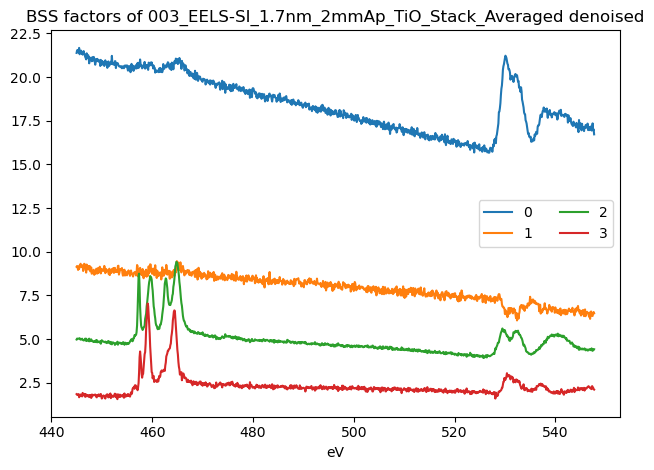

In [9]:
s.plot_bss_factors()

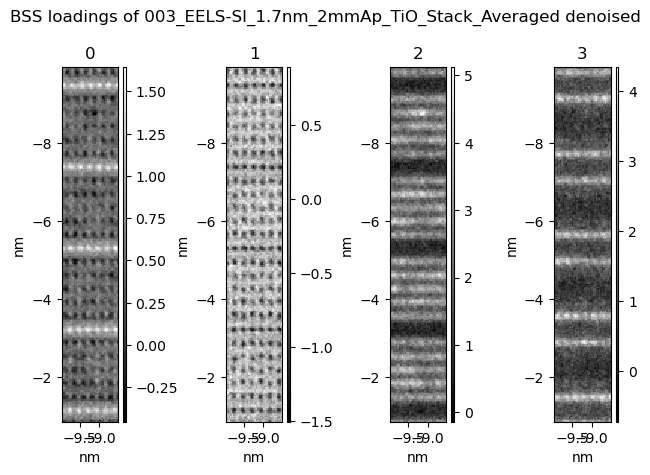

In [30]:
s.plot_bss_loadings(per_row=4)

In [10]:
factors = s.get_bss_factors()
factors

<EELSSpectrum, title: BSS factors of 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (4|1028)>

In [11]:
loadings = s.get_bss_loadings()
loadings

<BaseSignal, title: BSS loadings of 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (4|38, 234)>

In [12]:
factor_2 = factors.inav[2]
factor_2

<EELSSpectrum, title: BSS factors of 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (|1028)>

In [13]:
factor_3 = factors.inav[3]

In [103]:
factor_2 = factor_2.isig[455.:470.]
factor_2

<EELSSpectrum, title: BSS factors of 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (|150)>

In [17]:
factor_3 = factor_3.isig[455.:470.]

In [18]:
loading_2 = loadings.inav[2]
loading_2

<BaseSignal, title: BSS loadings of 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised, dimensions: (|38, 234)>

In [19]:
loading_3 = loadings.inav[3]

In [23]:
loading_3.isig[:, -7.5:-3.].plot()

In [29]:
haadf = hs.load("003_EELS-SI_HAADF-During_1.7nm_ThinArea_Stack_Averaged.dm3")
haadf

<Signal2D, title: , dimensions: (|40, 236)>

In [102]:
s_denoised = s_denoised.isig[455.:470.]
s_denoised

<EELSSpectrum, title: 003_EELS-SI_1.7nm_2mmAp_TiO_Stack_Averaged denoised model from decomposition with 4 components, dimensions: (38, 234|150)>

In [105]:
s_denoised.sum().plot()

In [63]:
loading_2 = loading_2.isig[:, -7.5:-3.]
loading_3 = loading_3.isig[:, -7.5:-3.]
haadf = haadf.isig[:, -7.5:-3.]

In [31]:
import matplotlib.pyplot as plt

In [252]:
fig = plt.figure(figsize=(9, 5))

In [253]:
gs = plt.GridSpec(100, 90)

In [254]:
ax_eels = fig.add_subplot(gs[:, :])

In [255]:
ax_haadf = fig.add_subplot(gs[:30, 80:])
ax_loading2 = fig.add_subplot(gs[35:65, 80:])
ax_loading3 = fig.add_subplot(gs[70:, 80:])

In [256]:
ax_eels.plot(s_denoised.sum().isig[455.:470.].axes_manager[0].axis, NormalizeData(s_denoised.sum().isig[455.:470.].data)+1.2, label='Total signal')
ax_eels.plot(factor_2.axes_manager[0].axis, NormalizeData(factor_2.data)+0.5, label="BSS factor 2")
ax_eels.plot(factor_3.axes_manager[0].axis, NormalizeData(factor_3.data), label="BSS factor 3")

In [257]:
ax_haadf.imshow(haadf, cmap="binary_r", extent=haadf.axes_manager.signal_extent)

In [258]:
ax_loading2.imshow(loading_2, cmap="binary_r", extent=loading_2.axes_manager.signal_extent)
ax_loading3.imshow(loading_3, cmap="binary_r", extent=loading_3.axes_manager.signal_extent)

In [259]:
ax_eels.set_yticks([])
ax_loading2.set_yticks([])
ax_loading3.set_yticks([])
ax_haadf.set_yticks([])

[]

In [260]:
ax_loading2.set_xticks([])
ax_loading3.set_xticks([])
ax_haadf.set_xticks([])

[]

In [261]:
for axis, color in zip([ax_haadf, ax_loading2, ax_loading3], ["blue", "orange", "green"]):
    for spine in axis.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(1.5)

In [262]:
ax_eels.set_xlabel("Energy loss (eV)")
ax_eels.set_ylabel("Intensity (au)")

Text(106.94444444444444, 0.5, 'Intensity (au)')

In [265]:
ax_eels.legend(loc="upper left", fontsize=9)

In [267]:
fig.savefig("Ti_decomp.png", transparent=True, dpi=300)

In [18]:
s_denoised.remove_background()

/home/gt622/mambaforge/envs/hyperspy_env/lib/python3.11/site-packages/jupyter_client/session.py:719: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [ ]:
Ti_peak_cropped = Ti_peak.inav[roi]
Ti_peak_cropped

In [ ]:
Ti_peak_cropped.plot()

In [22]:
m = Ti_peak.create_model(auto_background=False)

In [23]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------

In [24]:
m.plot(plot_components=True)

In [25]:
g1 = hs.model.components1D.GaussianHF()
m.append(g1)
m.components.GaussianHF.name = "e_g"

In [26]:
m.fit_component(g1, signal_range=(458., 461.), only_current=False)

  0%|          | 0/8892 [00:00<?, ?it/s]

In [ ]:
# g1.plot()

In [27]:
g2 = hs.model.components1D.GaussianHF()
m.append(g2)
m.components.GaussianHF.name = "t_2g"

In [28]:
m.fit_component(g2, signal_range=(456., 458.), only_current=False)

  0%|          | 0/8892 [00:00<?, ?it/s]

In [31]:
m.set_signal_range(456.4, 461.)

In [32]:
m.multifit(iterpath="serpentine")

  0%|          | 0/8892 [00:00<?, ?it/s]

In [33]:
m.reset_signal_range()

In [34]:
eg_t2g_ratio = g1.height.as_signal() / g2.height.as_signal()

In [35]:
eg_t2g_ratio.plot()

In [36]:
g1.set_parameters_not_free()
g2.set_parameters_not_free()

In [37]:
g3 = hs.model.components1D.GaussianHF()
m.append(g3)
m.components.GaussianHF.name = "L_2"

In [42]:
m.fit_component(g3, only_current=False)

  0%|          | 0/8892 [00:00<?, ?it/s]

In [43]:
m.reset_signal_range()

In [44]:
g4 = hs.model.components1D.Gaussian()
m.append(g4)

In [45]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |                 e_g |                 e_g |          GaussianHF
   1 |                t_2g |                t_2g |          GaussianHF
   2 |                 L_2 |                 L_2 |          GaussianHF
   3 |            Gaussian |            Gaussian |            Gaussian

In [46]:
m.store(name='okay_fit')

In [47]:
m.fit_component(g4, only_current=False)

  0%|          | 0/8892 [00:00<?, ?it/s]

In [ ]:
m.set_signal_range()

In [50]:
m.store(name='okay_fit')

In [49]:
m.save("Ti_fit.hspy")

In [51]:
hs.plot.plot_images([m.components.e_g.fwhm.as_signal(), m.components.e_g.height.as_signal()],
                   label=["FWHM", "Height"],
                   axes_decor="off")

[<Axes: title={'center': 'FWHM'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>,
 <Axes: title={'center': 'Height'}, xlabel='x axis (nm)', ylabel='y axis (nm)'>]